In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:

pip install plotly

SyntaxError: invalid syntax (<ipython-input-1-cc386e4a6738>, line 1)

In [23]:
pd.set_option('display.max_rows', 90)

## Data Cleaning

Load CSV files into pandas dataframes

*translation tables*

In [59]:
census_geoid1 = pd.read_csv('Census_Block_Groups_Census_2010_Michigan.csv')
census_geoid1.head()

OBJECTID  STATEFP10  COUNTYFP10  TRACTCE10  BLKGRPCE10       GEOID10  \
0      7366         26         163     538400           1  261635384001   
1      7367         26         163     538100           1  261635381001   
2      7368         26         163     537800           3  261635378003   
3      7369         26         163     537800           2  261635378002   
4      7370         26         163     537800           1  261635378001   

      NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10  INTPTLAT10  \
0  Block Group 1   G5030          S   303493         0   42.429874   
1  Block Group 1   G5030          S   367927         0   42.442592   
2  Block Group 3   G5030          S   225740         0   42.389469   
3  Block Group 2   G5030          S   364088         0   42.392940   
4  Block Group 1   G5030          S   237831         0   42.392587   

   INTPTLON10     City  TractBG                              GlobalID  \
0  -83.136822  Detroit  5384001  4f36ea46-b851-4fc4-b484-b694f32019ca   
1  -83.139165  Detroit  5381001  c73f88bf-6605-4462-85f5-9f71317af601   
2  -83.185801  Detroit  5378003  3e6a4e7a-36c1-4b82-8ecd-0360a88e1f67   
3  -83.184911  Detroit  5378002  618f8cf7-b8a8-4092-81ea-4e3c7f8132ef   
4  -83.193778  Detroit  5378001  b13b92d2-01fe-4b72-9bff-e55e75b07a31   

    SqMiles      Acres  
0  0.117179  74.994753  
1  0.142057  90.916742  
2  0.087159  55.781569  
3  0.140575  89.968104  
4  0.091827  58.769320

In [2]:
# county , census tract and GEOID10
# census block 2010 : conversion info state&county FIPS code, census tract #, GEOID10, city
census_geoid = pd.read_csv('Census_Block_Groups_Census_2010_Michigan.csv')
census_geoid.drop(['BLKGRPCE10','MTFCC10', 'FUNCSTAT10', 'ALAND10', 'INTPTLAT10','INTPTLON10',
                   'GlobalID', 'SqMiles', 'AWATER10', 'TractBG'], axis=1, inplace=True)
census_geoid.columns = ['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'CENSUSTRACT', 'GEOID10',
       'NAMELSAD10', 'City', 'Acres']
census_geoid['CENSUSTRACT'] = census_geoid['CENSUSTRACT'].apply(lambda x: x/100)
census_geoid.head()

OBJECTID  STATEFP10  COUNTYFP10  CENSUSTRACT       GEOID10     NAMELSAD10  \
0      7366         26         163       5384.0  261635384001  Block Group 1   
1      7367         26         163       5381.0  261635381001  Block Group 1   
2      7368         26         163       5378.0  261635378003  Block Group 3   
3      7369         26         163       5378.0  261635378002  Block Group 2   
4      7370         26         163       5378.0  261635378001  Block Group 1   

      City      Acres  
0  Detroit  74.994753  
1  Detroit  90.916742  
2  Detroit  55.781569  
3  Detroit  89.968104  
4  Detroit  58.769320

In [3]:
# County, entity, ANSI code
# FIPS state, county, entity, ANSI and GU codes with entity description
fips_codes = pd.read_excel('fips_codes_website.xls')
fips_codes = fips_codes.loc[fips_codes["State Abbreviation"] == 'MI']
fips_codes.head()

State Abbreviation  State FIPS Code  County FIPS Code  FIPS Entity Code  \
14578                 MI               26               139              1360   
14579                 MI               26               161              3020   
14580                 MI               26                69              4300   
14581                 MI               26               161              4180   
14582                 MI               26                17              5120   

       ANSI Code    GU Name Entity Description  
14578    1625822  Allendale   charter township  
14579    1625838  Ann Arbor   charter township  
14580    1625865   Au Sable   charter township  
14581    1625863    Augusta   charter township  
14582    1625878     Bangor   charter township

In [75]:
# zipcode to other tract..
zip_tract10 = pd.read_excel('TRACT_ZIP_122010.xlsx')

In [77]:
zip_tract10.loc[(zip_tract10['ZIP'] < 5000 )& (zip_tract10['ZIP'] > 4000)]

TRACT   ZIP  RES_RATIO  BUS_RATIO  OTH_RATIO  TOT_RATIO
55247  23001010100  4210   1.000000   1.000000   1.000000   1.000000
55248  23001010200  4210   0.997790   1.000000   1.000000   0.998300
55249  23001010200  4258   0.001326   0.000000   0.000000   0.001020
55250  23001010200  4282   0.000884   0.000000   0.000000   0.000680
55251  23001010300  4210   1.000000   1.000000   1.000000   1.000000
55252  23001010400  4210   1.000000   1.000000   1.000000   1.000000
55253  23001010500  4210   1.000000   1.000000   1.000000   1.000000
55254  23001010600  4210   1.000000   1.000000   0.976190   0.999211
55255  23001010600  4223   0.000000   0.000000   0.023810   0.000789
55256  23001010700  4210   0.992695   1.000000   1.000000   0.994076
55257  23001010700  4258   0.007305   0.000000   0.000000   0.005924
55258  23001010800  4210   0.998321   1.000000   1.000000   0.998385
55259  23001010800  4258   0.001679   0.000000   0.000000   0.001615
55260  23001020100  4240   1.000000   1.000000   1.000000   1.000000
55261  23001020200  4240   1.000000   1.000000   1.000000   1.000000
55262  23001020300  4240   1.000000   1.000000   1.000000   1.000000
55263  23001020400  4240   1.000000   1.000000   1.000000   1.000000
55264  23001020500  4240   1.000000   1.000000   1.000000   1.000000
55265  23001020600  4240   0.979757   1.000000   1.000000   0.983266
55266  23001020600  4250   0.020243   0.000000   0.000000   0.016734
55267  23001020700  4240   1.000000   1.000000   1.000000   1.000000
55268  23001020800  4240   1.000000   1.000000   1.000000   1.000000
55269  23001020900  4240   1.000000   1.000000   1.000000   1.000000
55270  23001030100  4240   0.007909   0.000000   0.000000   0.007473
55271  23001030100  4250   0.913989   0.941176   0.980000   0.916394
55272  23001030100  4252   0.078102   0.058824   0.020000   0.076133
55273  23001030200  4252   1.000000   1.000000   1.000000   1.000000
55274  23001040000  4210   0.016749   0.000000   0.000000   0.016514
55275  23001040000  4222   0.983251   1.000000   1.000000   0.983486
55276  23001041000  4015   0.001787   0.014925   0.000000   0.002141
55277  23001041000  4230   0.000000   0.000000   0.034483   0.000428
55278  23001041000  4260   0.006699   0.089552   0.000000   0.008994
55279  23001041000  4270   0.005806   0.000000   0.000000   0.005567
55280  23001041000  4274   0.985708   0.895522   0.931035   0.982441
55281  23001041000  4291   0.000000   0.000000   0.034483   0.000428
55282  23001041500  4210   0.002605   0.000000   0.000000   0.002468
55283  23001041500  4256   0.582718   0.901235   0.957447   0.600576
55284  23001041500  4258   0.409466   0.098765   0.021277   0.391608
55285  23001041500  4274   0.005211   0.000000   0.000000   0.004936
55286  23001041500  4288   0.000000   0.000000   0.021277   0.000411
55287  23001042000  4210   0.000485   0.000000   0.000000   0.000458
55288  23001042000  4220   0.000970   0.000000   0.000000   0.000916
55289  23001042000  4266   0.000000   0.000000   0.027778   0.000458
55290  23001042000  4282   0.998544   1.000000   0.972222   0.998168
55291  23001043000  4253   1.000000   1.000000   1.000000   1.000000
...            ...   ...        ...        ...        ...        ...
56039  23031022000  4049   0.999189   1.000000   1.000000   0.999205
56040  23031022500  4020   0.438144   0.846154   0.234043   0.443200
56041  23031022500  4028   0.000000   0.000000   0.021277   0.000800
56042  23031022500  4047   0.561856   0.153846   0.744681   0.556000
56043  23031023000  4048   1.000000   1.000000   1.000000   1.000000
56044  23031023500  4001   0.379890   0.232143   0.840909   0.384127
56045  23031023500  4056   0.000366   0.000000   0.022727   0.000705
56046  23031023500  4076   0.418647   0.660714   0.113636   0.418695
56047  23031023500  4095   0.201097   0.107143   0.022727   0.196473
56048  23031024000  4002   0.000416   0.000000   0.000000   0.000396
56049  23031024000  4030   0.278470   0.507937   0.254545   0.283677
56050  2303

In [114]:
parcels.ZONING.value_counts()

R1     187913
R2     132486
B4      20346
R3      10606
M4       7431
         4392
R5       3993
B2       3608
PD       2386
M3       1699
M2       1422
R6        934
SD2       669
SD4       626
R4        548
B5        519
B3        492
B6        307
M5        256
SD1       206
P1        199
PCA       111
B1         89
PR         76
TM         36
PC         26
SD5        23
W1          3
M1          2
Name: ZONING, dtype: int64

In [4]:
# getting table data from http://proximityone.com/ziptractequiv.htm#profiles
# for textarea in soup.findAll('textarea'):
#     contents = BeautifulSoup.BeautifulSoup(textarea.contents[0]).renderContents()
#     textarea.replaceWith(contents)

*feature tables*

In [5]:
# GEOID10 & residential/business percent occupied 
zoning_vacancy = pd.read_csv('Addresses_Use_and_Vacancy_Block_Q42016.csv')
zoning_vacancy.drop(["GlobalID",'Shape__Area','Shape__Length'], axis=1,inplace=True)
zoning_vacancy.dropna(subset=['PctVAC'],inplace=True) # drop rows that don't contain % vacant
zoning_vacancy.head()

OBJECTID          GEOID10  OCC_RES  OCC_BUS  VAC_RES  VAC_BUS  \
0      1001  261635357002007     35.0      NaN     17.0      NaN   
3      1004  261635356003014     18.0      NaN      1.0      NaN   
4      1005  261635347004015      6.0      NaN      1.0      NaN   
5      1006  261635347004020      7.0      2.0      1.0      3.0   
6      1007  261635353005021     24.0      1.0      4.0      NaN   

   TotalAddresses  TotalOCC  TotalVAC  TotRES  TotBUS    PctVAC  
0              52        35        17      52       0  0.326923  
3              19        18         1      19       0  0.052632  
4               7         6         1       7       0  0.142857  
5              13         9         4       8       5  0.307692  
6              29        25         4      28       1  0.137931

*rental info*

In [ ]:
hist_rentals = pd.read_csv('Rental_Registrations_HISTORIC.csv')
hist_rentals.drop(hist_rentals.loc[hist_rentals.parcelnum.isnull()].index,inplace=True)
hist_rentals['athome_owner'] = [True if str(hist_rentals['address'][i]).lower() == str(rentals['owner_address'][i]).lower() else (False) for i in range(len(rentals))]

In [200]:
rent_lite = pd.DataFrame(hist_rentals[['parcelnum','athome_owner']].unique(), 
                         columns=['PARCELNUM','athome_renter'])
rent_lite['rental'] = np.ones(len(rent_lite))
rent_lite.head()

PARCELNUM  rental
0   22043465.     1.0
1  08002072-9     1.0
2  08002082-6     1.0
3   22105664.     1.0
4   03003237.     1.0

In [62]:
# Registered rentals by ZIP CODE, engineered column of athome_owner
rentals = pd.read_csv('All_Registered_Rentals.csv')
rentals = rentals.loc[(rentals['owner_city'] == 'DETROIT') | (rentals['owner_city'] == 'Detroit')]
rentals.drop(['X','Y', 'record_id', 'date_status','owner_name','task', 'status', "ObjectId"], axis=1, inplace=True)
rentals.reset_index(inplace=True)

# create a new column for owners at home - see doc for reasoning
rentals['athome_owner'] = [True if str(rentals['address'][i]).lower() == str(rentals['owner_address'][i]).lower() else (False) for i in range(len(rentals))]
# drop anomolies of record type and irrelevant columns
rentals.drop(rentals.loc[rentals['record_type'] == 'Rental Property Registration Renewal'].index, inplace=True)
rentals.drop(['record_type', 'owner_address', 'owner_city', 'owner_state', 'owner_zip'], axis=1,inplace=True)
rentals.head()

index          address    zip  units  athome_owner
0      9   14019 Artesian  48223    1.0         False
1     14   5115 YORKSHIRE  48207    1.0         False
2     16  5641 MERRITT St  48209    NaN         False
3     20        9392 Ohio  48204    3.0         False
4     23   10790 SOMERSET  48224    1.0         False

In [63]:
rentals.shape

(3111, 5)

In [103]:
# WARNING: will take a long time
blight = pd.read_csv('Blight_Violations_DAH.csv')
blight.drop(blight.loc[blight.parcelno == 'CONDO BUILDING'])
# generate column with total notifications total per parcel
blight['total_tickets'] = blight.parcelno.apply(lambda x: \
                                                blight.loc[blight.loc[blight.parcelno == x]].shape[0])
# generate column with total sum owed per parcel
blight['total_due_parcel'] = blight.parcelno.apply(lambda x: blight.loc[blight.parcelno == x].\
                                                   balance_due.sum())
blight_lite = blight[['parcelno', 'total_due_parcel','total_tickets']]

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


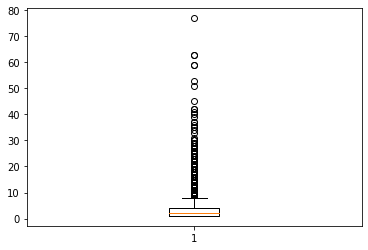

In [157]:
ax = plt.subplot()
plt.boxplot(blight.loc[(blight['parcelno'] != 'CONDO BUILDING') & (blight['parcelno'] != '22018751-68')].parcelno.value_counts(), autorange=True);

In [85]:
# parcels info - likely not useful
parcels = pd.read_csv('Parcels.csv')
parcels = parcels[['PARCELNUM','ADDRESS', 'ZIP_CODE','OWNER1','OWN_STREET', 'OWN_CITY', 'OWN_ZIP',
         'TAX_STATUS','SQFT','TOTAL_ACRE', 'FRONTAGE', 'DEPTH', 'YR_BUILT','NUM_BLDGS', 
         'SALE_PRICE', 'SALE_DATE','TXBL_VAL', 'LAND_VALUE','ZONING']]
parcels['govt_owned'] = parcels.OWNER1.apply(lambda x: ('detroit' in x.lower()))
parcels['sold'] = parcels.SALE_PRICE.apply(lambda x: (x != 0))

In [95]:
parcels['OWNER1'].value_counts() 

DETROIT LAND BANK AUTHORITY            95157
City of Detroit P&DD, Care of DBA       7908
HANTZ WOODLANDS LLC                     1929
TAXPAYER                                 896
CITY OF DETROIT                          689
MICHIGAN DEPT OF TRANSPORTATION          644
DETROIT PUBLIC SCHOOLS                   603
MARATHON PETROLEUM COMPANY LP            515
DETROIT HOUSING COMMISSION               503
DETROIT PARKS & RECREATION               501
HUD                                      435
FANNIE MAE                               391
NEW FAR EAST SIDE DEVELOPMENT            363
CROWN ENTERPRISES INC                    340
MI LAND BANK FAST TRACK AUTH             318
RECOVERYPARK FARMS INC                   268
MOONEY REAL ESTATE HOLDINGS              247
TATARIAN, MATTHEW                        193
WAYNE COUNTY TREASURER                   191
HENRY FORD HEALTH SYSTEM                 182
WAYNE STATE UNIVERSITY                   165
DETROIT LEASING COMPANY                  163
MLC RENTAL

In [96]:
parcels['govt_owned'] = parcels.OWNER1.apply(lambda x: ('detroit' in x.lower()))

True

In [92]:
parcels.loc[(parcels['SALE_PRICE'] != 0) & (parcels['SALE_DATE'] == '')]

Empty DataFrame
Columns: [PARCELNUM, ADDRESS, ZIP_CODE, OWNER1, OWN_STREET, OWN_CITY, OWN_ZIP, TAX_STATUS, SQFT, TOTAL_ACRE, FRONTAGE, DEPTH, YR_BUILT, NUM_BLDGS, SALE_PRICE, SALE_DATE, TXBL_VAL, LAND_VALUE, ZONING]
Index: []

In [176]:
parcels.TAX_STATUS.value_counts()

TAXABLE                 265207
CITY LAND BANK           95243
CITY OWNED                9221
RELIGIOUS                 3605
PILOT                     2193
STATE OWNED                971
COUNTY OWNED               828
BOARD OF EDUCATION         624
BENEVOLENT/CHARITY         503
EDUCATION/SCIENTIFIC       443
STATUTORY                  363
STATE LAND BANK            332
RAILROAD                   320
DETROIT HOUSING COMM       279
FEDERAL                    259
NON-PROFIT                 194
WATER DEPARTMENT           147
HOSPITAL                   142
ASSESSED WITH OTHERS       123
COUNTY LAND BANK           107
                           100
REAL ESTATE DIVISION        80
COMMUNICATIONS              46
PROJECTS                    30
PARSONAGE                   22
PUBLIC LIGHTING             12
DISABLED VETERAN             8
PA 245                       1
SEMTA                        1
Name: TAX_STATUS, dtype: int64

In [8]:
# major crimes from 2011-2014 by CENSUS TRACT
crimes = pd.read_csv('Reported_Major_Crimes_2011_to_2014.csv')
crimes.drop(['OFFENSEDESCRIPTION','STATEOFFENSEFILECLASS','SCA','PRECINCT',
             'LOCATION','ObjectId'], axis=1, inplace=True)
crimes.dropna(inplace=True)
crimes['INCIDENTDATE'] = crimes['INCIDENTDATE'].apply(lambda x: int(x[:4]))
crimes.reset_index()

index   ROWNUM            CATEGORY  INCIDENTDATE  HOUR  \
0            0  1318073             LARCENY          2011    12   
1            2  1318077      STOLEN VEHICLE          2011     2   
2            3  1318079             LARCENY          2011    14   
3            4  1318080  AGGRAVATED ASSAULT          2011    15   
4            5  1318082            BURGLARY          2011    16   
5            6  1318086            BURGLARY          2011    12   
6            7  1318089            BURGLARY          2011    15   
7            8  1318091      STOLEN VEHICLE          2011     2   
8            9  1318092             ROBBERY          2011    15   
9           10  1318093      STOLEN VEHICLE          2011     6   
10          11  1318094      STOLEN VEHICLE          2011    15   
11          12  1318095            BURGLARY          2011    17   
12          13  1318097            BURGLARY          2011    11   
13          14  1318099             LARCENY          2011    18   
14          15  1318101            BURGLARY          2011    13   
15          16  1318105            BURGLARY          2011    17   
16          17  1318106             LARCENY          2011    17   
17          18  1318116      STOLEN VEHICLE          2011    19   
18          19  1318194            BURGLARY          2011    23   
19          20  1318117      STOLEN VEHICLE          2011     6   
20          21  1318118            BURGLARY          2011     7   
21          22  1318121             LARCENY          2011    18   
22          23  1318122             LARCENY          2011    13   
23          24  1318123            BURGLARY          2011    14   
24          25  1318126            BURGLARY          2011    15   
25          26  1318131  AGGRAVATED ASSAULT          2011    18   
26          27  1318132            BURGLARY          2011    17   
27          28  1318133            BURGLARY          2011    22   
28          29  1318135            BURGLARY          2011    15   
29          30  1318140             LARCENY          2011    16   
...        ...      ...                 ...           ...   ...   
215867  234942  1891522             LARCENY          2014     8   
215868  234943  1891524             LARCENY          2014    13   
215869  234944  1891524            BURGLARY          2014    13   
215870  234945  1891525             LARCENY          2014    13   
215871  234946  1891533            BURGLARY          2014    13   
215872  234947  1891540      STOLEN VEHICLE          2014    20   
215873  234948  1891541             LARCENY          2014    23   
215874  234950  1891543  AGGRAVATED ASSAULT          2014     2   
215875  234952  1891549            BURGLARY          2014    12   
215876  234953  1891551             LARCENY          2014    12   
215877  234954  1891552             LARCENY          2014     1   
215878  234955  1891553            BURGLARY          2014    15   
215879  234956  1891554             LARCENY          2014     1   
215880  234957  1891560             ROBBERY          2014    13   
215881  234959  1891567             ROBBERY          2014    14   
215882  234960  1891569            HOMICIDE          2014    15   
215883  234961  1891570             LARCENY          2014    14   
215884  234962  1891571      STOLEN VEHICLE          2014     1   
215885  234964  1891576             ROBBERY          2014    14   
215886  234966  1891578      STOLEN VEHICLE          2014     2   
215887  234967  1891579             LARCENY          2014    18   
215888  234968  1891584  AGGRAVATED ASSAULT          2014    15   
215889  234969  1891585  AGGRAVATED ASSAULT          2014    16   
215890  234970  1891587      STOLEN VEHICLE          2014    13   
215891  234972  1891591      STOLEN VEHICLE          2014    22   
215892  234973  1891592             LARCENY          2014    15   
215893  234974  1891597            BURGLARY          2014    15   
215894  234975  1891598      STOLEN VEHICLE          201

In [9]:
# tax foreclosure info
tax = pd.read_csv('Tax_Foreclosures_2016.csv')
tax.shape

(7700, 9)

*target variable*

In [11]:
# vacancy index by Census Tract
vacancy_2014 = pd.read_csv('Vacancy_Index_November_2014_Aggregated.csv')
vacancy_2014.drop("GEOID10", axis=1, inplace=True)
# align census tract formatting and drop irrelevant columns
vacancy_2014['NAMELSAD10'] = vacancy_2014['NAMELSAD10'].apply(lambda x: float(x[-4:]))
vacancy_2014.drop(['SqMiles','Acres','CounciDist'], axis=1, inplace=True)
vacancy_2014.columns = ['OBJECTID', 'CENSUSTRACT', 'Likely_Occupied', 'Potentially_Vacant', 'Likely_Vacant',
       'VeryLikely_Vacant', 'Total_MCM_Parcel_Count', 'Pct_Likely_Occupied',
       'Pct_Potentially_Vacant', 'Pct_Likely_Vacant', 'Pct_VeryLikely_Vacant']

## GEOID10 & Zoning_Vacandy Data Set EDA

In [48]:
z_geoid = zoning_vacancy['GEOID10'].apply(lambda x: x//1000)
g_geoid = census_geoid['GEOID10']

In [51]:
geo_comp = pd.DataFrame(z_geoid)
geo_comp.columns = ['zoning_id']
geo_comp['general_id'] = np.zeros(len(geo_comp))
geo_comp.reset_index(inplace=True)

In [54]:
# match up element in general and zoning geoid
missing_in_geo = []
for g in range(len(g_geoid)):
    added = False
    for i in range(len(geo_comp)):
        if (geo_comp['zoning_id'][i] == g_geoid[g]):
            geo_comp['general_id'][i] = g_geoid[g]
            added = True
    if added == False:
        missing_in_geo.append(g_geoid[g])
# drop all empty values (aka CT values in crime that do not exist in general_census)        
excess_zoning_geo = geo_comp[geo_comp['general_id'] == 0]
zero_id = list(geo_comp[geo_comp['general_id'] == 0].index)
geo_comp.drop(index=zero_id, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


KeyboardInterrupt: 

In [56]:
len(zero_id)

10676

In [57]:
len(geo_comp)

10676

## CENSUSTRACT & Crime Data Set EDA

In [12]:
# what is happening with items in outlier census tracts?
crimes_by_ct = crimes.groupby('CENSUSTRACT')['CATEGORY'].value_counts()
crimes_by_ct

CENSUSTRACT  CATEGORY          
0.00         LARCENY                 54
             AGGRAVATED ASSAULT      11
             STOLEN VEHICLE           9
             BURGLARY                 7
             ROBBERY                  2
1.00         LARCENY                  1
9.00         LARCENY                 17
             ROBBERY                 13
             AGGRAVATED ASSAULT      12
             BURGLARY                11
             STOLEN VEHICLE           9
13.00        LARCENY                  1
17.00        AGGRAVATED ASSAULT       1
26.00        BURGLARY                 1
27.00        LARCENY                  2
             ROBBERY                  1
28.00        STOLEN VEHICLE           1
28.01        AGGRAVATED ASSAULT       1
31.01        STOLEN VEHICLE           1
31.02        BURGLARY                 2
             AGGRAVATED ASSAULT       1
34.00        LARCENY                  1
40.00        BURGLARY                 1
             STOLEN VEHICLE           1
61.00   

In [19]:
census_g = pd.Series(census_geoid['CENSUSTRACT'].unique())
census_g.describe().apply(lambda x: format(x, 'f'))

count     297.000000
mean     5344.774411
std       664.132344
min      5001.000000
25%      5132.000000
50%      5262.000000
75%      5387.000000
max      9859.000000
dtype: object

In [18]:
census_c = pd.Series(crimes['CENSUSTRACT'].unique())
census_c.describe().apply(lambda x: format(x, 'f'))

count         639.000000
mean       451225.048638
std       6380986.315309
min             0.000000
25%          2418.000000
50%          5171.000000
75%          5436.500000
max      99992015.000000
dtype: object

In [20]:
census_comp = pd.DataFrame(census_c)
census_comp.columns = ['crime_CT']
census_comp['general_census'] = np.zeros(len(census_comp))
# match up element in general and crime census tracts
missing_in_crime = []
for g in range(len(census_g)):
    added = False
    for i in range(len(census_comp)):
        if (census_comp['crime_CT'][i] == census_g[g]):
            census_comp['general_census'][i] = census_g[g]
            added = True
    if added == False:
        missing_in_crime.append(census_g[g])
# drop all empty values (aka CT values in crime that do not exist in general_census)        
excess_crime_census = census_comp[census_comp['general_census'] == 0]
zero_c = list(census_comp[census_comp['general_census'] == 0].index)
census_comp.drop(index=zero_c, inplace=True)

*useful variables for cleaning*

In [21]:
missing_in_crime # general census values not present in crime data
excess_crime_census['crime_CT'] # crime "census" values that aren't in general census table

49         5748.00
86         2637.00
99         5520.00
143        2641.00
172        2640.00
185        1616.00
207        5515.00
248        5524.00
249        5798.00
274     7888889.00
277        2636.00
279        2588.00
281        5743.00
282        5536.00
283        1416.00
285        2589.00
286        8303.00
287        1674.00
288        1946.00
289        2642.00
290        5731.00
291        5619.00
292        1928.00
293        5531.00
294        5516.00
295        2630.00
296        5503.00
297        5548.00
298        2238.00
299           0.00
          ...     
592        5582.00
593        5583.00
594          26.00
595        2619.00
596        1606.00
597        5580.00
598        9702.00
599        5538.00
600           1.00
601         120.01
602        5753.00
603        1700.00
604        2610.00
605        1735.00
606         212.00
607        5795.00
608         117.01
609        2417.00
610        1816.00
611          34.00
612          61.00
613        8

### Cleaning Crime Data (with new information on census tract)

In [445]:
crimes.CATEGORY.value_counts()

LARCENY               62978
BURGLARY              53161
STOLEN VEHICLE        44968
AGGRAVATED ASSAULT    34286
ROBBERY               19256
HOMICIDE               1248
Name: CATEGORY, dtype: int64

In [22]:
crimes.shape

(215897, 6)

In [ ]:
# DO WHEN HAVE THE TIME TO WAIT
# clean up crimes - erase rows with census tracts not present in crimes data
count = 0
for e in range(len(excess_crime_census)):
    found = False
    for c in range(len(crimes)):
        try:
            if crimes['CENSUSTRACT'][c] == excess_crime_census['crime_CT'][e]:
                crimes.drop(c, inplace=True)
                count += 1
        except:
            continue

print (count, crimes.shape)

# Making final df for project

In [ ]:
df = pd.merge(census_geoid, rentals,)